In [292]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

%config InlineBackend.rc = {}
%matplotlib inline

In [251]:
data_path = './data/PESSTO/'

# Catalogues
photometry_path = data_path + 'Multi-epoch Photometry Catalogue/'
transient_path = data_path + 'Transient Catalogue/'

# Data
imaging_path = data_path + 'Imaging Data/'
spectral_path = data_path + 'Spectral Data/'

## Transient Catalogue Exploration

In [271]:
trans_cat_filename = 'catalogue.fits'

hdu_list = fits.open(transient_path + trans_cat_filename)
hdu_list.info()

Filename: ./data/PESSTO/Transient Catalogue/catalogue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   ()      
  1  PHASE3CATALOG    1 BinTableHDU    227   1035R x 30C   [50A, 50A, E, E, 20A, I, 20A, I, J, E, 20A, I, I, J, E, 10A, I, I, 50A, E, E, E, E, 10A, E, 10A, E, E, 50A, 200A]   


In [272]:
# Display PRIMARY HDU Info
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-14T13:45:06' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / ESO Telescope designation                      
INSTRUME= 'EFOSC   '           / Instrument name                                
RADECSYS= 'FK5     '           / Coordinate reference frame                     
MJD-OBS =                55930 / Start of observations (days)                   
MJD-END =                57509 / End of observations (days)                     
PROG_ID = 'MULTI   '           / ESO programme identification                   
PROGID1 = '188.D-3003'      

In [282]:
# Has PRIMARY HDU got any data?
print(hdu_list[0].data is not None)

False


In [274]:
# Display BINTABLE HDU Info
hdu_list[1].header

XTENSION= 'BINTABLE'           / FITS Extension first keyword                   
BITPIX  =                    8 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  554 / width of table in bytes                        
NAXIS2  =                 1035 / number of rows in table                        
PCOUNT  =                    0 / Parameter count                                
GCOUNT  =                    1 / Group count                                    
TFIELDS =                   30 / number of columns                              
EXTNAME = 'PHASE3CATALOG'      / FITS Extension name                            
TTYPE1  = 'TRANSIENT_ID'       / Label for field 1                              
TFORM1  = '50A     '           / Data format of field 1                         
TUNIT1  = '' / Physical unit for field 1                                        
TCOMM1  = 'The master name o

In [280]:
# Has BINTABLE HDU got any data?
print(hdu_list[1].data is not None)

True


We realize that the first header is the file metadata, which contains information about the catalogue itself. On the other hand, the second header is a binary table with the contents of the catalogue.

In [170]:
# Transform Catalogue to Pandas
transient_df = Table(hdu_list[1].data).to_pandas()
# Close HDU file
hdu_list.close()

#### Sample Row

In [172]:
transient_df.iloc[0]

TRANSIENT_ID                                                   SN2013U
TRANSIENT_DISCOVERY_ID                             PSNJ100112000019423
TRANSIENT_RAJ2000                                                150.3
TRANSIENT_DECJ2000                                            0.328417
TRANSIENT_CLASSIFICATION                                         SN Ia
TRANSIENT_CLASSIFICATION_PECULIAR_FLAG                               1
TRANSIENT_CLASSIFICATION_SOURCE                              CBET 3410
TRANSIENT_CLASSIFICATION_ATEL                                        0
TRANSIENT_CLASSIFICATION_MJD                                     56329
TRANSIENT_CLASSIFICATION_REDSHIFT                              0.03451
TRANSIENT_CLASSIFICATION_PHASE                                 pre-max
TRANSIENT_CLASSIFICATION_PHASE_DAYS_LOWER_LIMIT                     -7
TRANSIENT_CLASSIFICATION_PHASE_DAYS_UPPER_LIMIT                     -4
TRANSIENT_DISCOVERY_MJD                                          56297
TRANSI

## Imaging Data Exploration

In [244]:
sample_img_filename = 'sample3.fits'
hdu_list = fits.open(imaging_path + sample_img_filename)
hdu_list.info()

Filename: ./data/PESSTO/Imaging Data/sample3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     278   (1513, 1496)   float32   


In [266]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-14T13:45:06' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / ESO Telescope designation                      
INSTRUME= 'EFOSC   '           / Instrument name                                
RADECSYS= 'FK5     '           / Coordinate reference frame                     
MJD-OBS =                55930 / Start of observations (days)                   
MJD-END =                57509 / End of observations (days)                     
PROG_ID = 'MULTI   '           / ESO programme identification                   
PROGID1 = '188.D-3003'      

In [245]:
image_data = hdu_list[0].data
hdu_list.close()
del hdu_list

### Display images

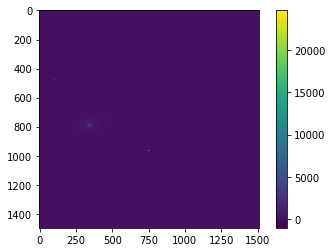

In [248]:
plt.figure()
plt.imshow(image_data)
plt.colorbar()

## Imaging Weights Data Exploration

In [218]:
sample_weight_filename = 'weights.fits'
hdu_list = fits.open(imaging_path + sample_img_filename)
hdu_list.info()

Filename: ./data/PESSTO/Imaging Data/weights.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     264   (1227, 1245)   float32   


In [268]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-14T13:45:06' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / ESO Telescope designation                      
INSTRUME= 'EFOSC   '           / Instrument name                                
RADECSYS= 'FK5     '           / Coordinate reference frame                     
MJD-OBS =                55930 / Start of observations (days)                   
MJD-END =                57509 / End of observations (days)                     
PROG_ID = 'MULTI   '           / ESO programme identification                   
PROGID1 = '188.D-3003'      

In [269]:
image_data = hdu_list[0].data
hdu_list.close()
del hdu_list

### Display images

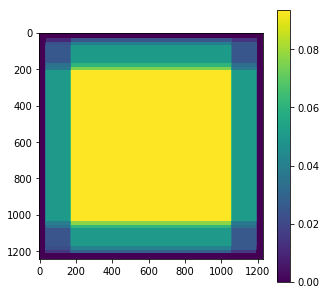

In [223]:
plt.figure(figsize=(5,5))
plt.imshow(image_data)
plt.colorbar()

## Spectral Catalogue Exploration

In [ ]:
spectral_filename = 'catalogue.fits'

hdu_list = fits.open(spectral_path + spectral_filename)
hdu_list.info()

In [205]:
# Display PRIMARY HDU Info
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-21T15:21:05' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / Telescope                                      
INSTRUME= 'MULTI   '           / Instrument name                                
INSTR1  = 'EFOSC   '           / Instrument name                                
INSTR2  = 'SOFI    '           / Instrument name                                
NOESODAT=                    T / True if non-ESO data used                      
MJD-OBS =                56013 / Start of observations (days)                   
MJD-END =                575

In [206]:
# Display BINTABLE HDU Info
hdu_list[1].header

XTENSION= 'BINTABLE'           / FITS Extension first keyword                   
BITPIX  =                    8 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  218 / width of table in bytes                        
NAXIS2  =                 2488 / number of rows in table                        
PCOUNT  =                    0 / Parameter count                                
GCOUNT  =                    1 / Group count                                    
TFIELDS =                   43 / number of columns                              
EXTNAME = 'PHASE3CATALOG'      / FITS Extension name                            
TTYPE1  = 'PHOT_ID '           / Label for field 1                              
TFORM1  = 'J       '           / Data format of field 1                         
TUNIT1  = '' / Physical unit of field 1                                         
TCOMM1  = 'Photometric Data 

Likewise, this catalog contains two headers where the first is the file metadata, and the second is a binary table with the contents of the catalogue.

In [194]:
# Transform Catalogue to Pandas
spectral_df = Table(hdu_list[1].data).to_pandas()
# Close HDU file
hdu_list.close()

#### Sample Catalogue row

In [217]:
transient_df.iloc[0]

PHOT_ID                              1000001
SOURCE_ID            CSS121015-004244+132827
MJD                                  56186.2
U_VEGA_MAG                               nan
U_VEGA_MAGERR                            nan
B_VEGA_MAG                               nan
B_VEGA_MAGERR                            nan
V_VEGA_MAG                             20.95
V_VEGA_MAGERR                           0.56
R_VEGA_MAG                               nan
R_VEGA_MAGERR                            nan
I_VEGA_MAG                               nan
I_VEGA_MAGERR                            nan
U_AB_MAG                                 nan
U_AB_MAGERR                              nan
G_AB_MAG                                 nan
G_AB_MAGERR                              nan
R_AB_MAG                                 nan
R_AB_MAGERR                              nan
I_AB_MAG                                 nan
I_AB_MAGERR                              nan
Z_AB_MAG                                 nan
Z_AB_MAGER

#### Count number of NaNs per column

In [298]:
# Proportion of null values per column
total = transient_df.isnull().sum()
proportion = transient_df.isnull().sum() / len(transient_df)*100
pd.concat([total, proportion], axis=1, keys= ['Total', 'Percentage'])

,Total,Percentage
PHOT_ID,0,0.000000
SOURCE_ID,0,0.000000
MJD,0,0.000000
U_VEGA_MAG,2231,89.670418
U_VEGA_MAGERR,2231,89.670418
B_VEGA_MAG,1800,72.347267
B_VEGA_MAGERR,1800,72.347267
V_VEGA_MAG,1552,62.379421
V_VEGA_MAGERR,1552,62.379421
R_VEGA_MAG,1921,77.210611
